# Real network from Therion survey

This notebook uses a real data set and demonstrates how karstnet can be used to:
- load the geometry of karstic network from two ASCII files or a Therion SQL file;
- plot the geometry and its simplification;
- computes the statistical properties of the network.
- plot density map of orientations and rose diagram

Nov. 2019

In [2]:
import karstnet as kn

### Load the data

The karstnet functions are belonging to the "base" module. 
To read a data file, different options are available. The simplest is 
the "from_nodlink_dat" function. The detailed help is shown below.

In [3]:
# Load the data set 
huttes = kn.from_nodlink_dat( '../data/Huttes' )  # '../data/Huttes' is the base name to access the 2 input ASCII files


Graph successfully created from file !



### Visual check

Karstnet offers a set of simple functions to check that the data that you just loaded have been properly imported. 

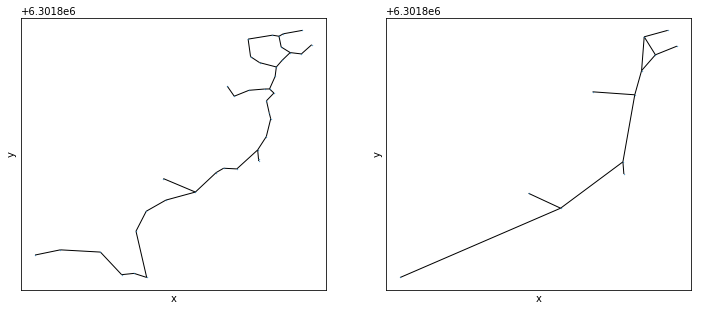

In [4]:
# Simple map view of original data (left) and simplified graph (right)
huttes.plot()

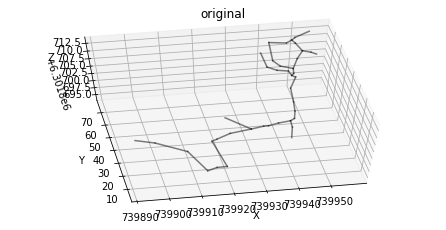

In [6]:
# Visualization of the original data
huttes.plot3(zrotation=60, xyrotation=10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


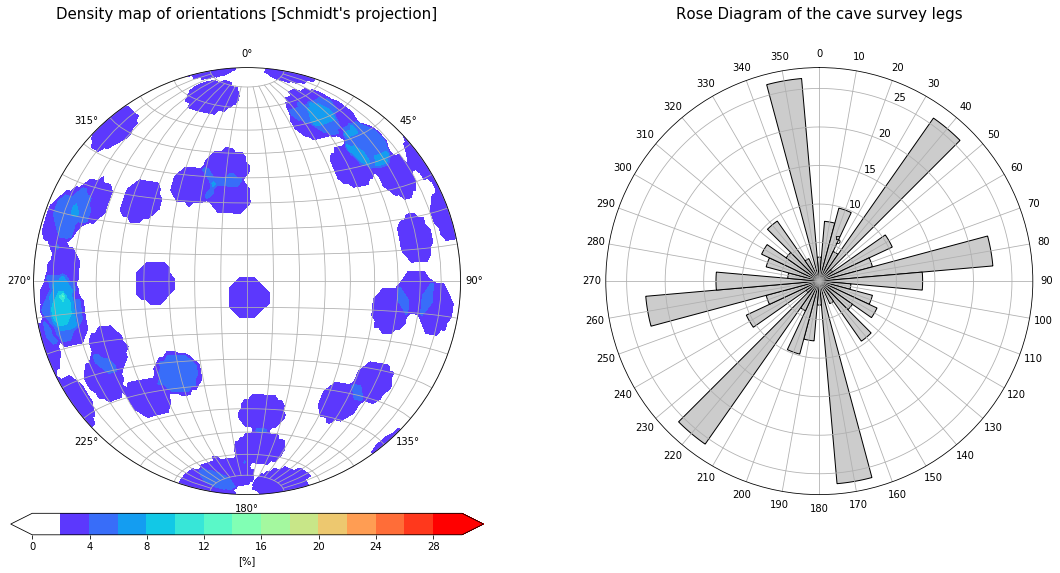

In [7]:
# Density map of orientation and rose diagram
huttes.stereo()

### Computing the statistical metrics

The simplest way to obtain all the statistics for that graph is to call the characterize_graph function as follows.

In [16]:
results = huttes.characterize_graph( verbose=True )

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 15.872
                 cv length = 0.999
            length entropy = 0.512
                tortuosity = 1.207
       orientation entropy = 0.977
                      aspl = 3.015
                       cpd = 0.474
               mean degree = 2.000
                 cv degree = 0.500
 correlation vertex degree = -0.333
--------------------------------------


### Load the data from the Therion SQL file

The karstnet functions are belonging to the "base" module. 
To import the data from a SQL file created with Therion from a caving survey, use the "from_therion_sql" function. The detailed help is shown below.

In [8]:
help( kn.base.from_therion_sql )

Help on function from_therion_sql in module karstnet.base:

from_therion_sql(basename)
    Creates the Kgraph from on SQL file exported from a Therion survey file.
    
    Parameters
    ----------
    basename : string
        The base name used for the input files.
    
        The input file is named using the following convention:
         - basename.sql: the containing all the needed informations
    
    Returns
    -------
    KGraph
        A KGraph object
    
    Examples
    --------
       >>> myKGraph = kn.from_therion_sql("MyKarst")



In [11]:
# Load the data set 
huttes = kn.from_therion_sql( '../data/g_huttes' )  # '../data/g_huttes' is the base name to access to g_huttes.sql


Graph successfully created from file !



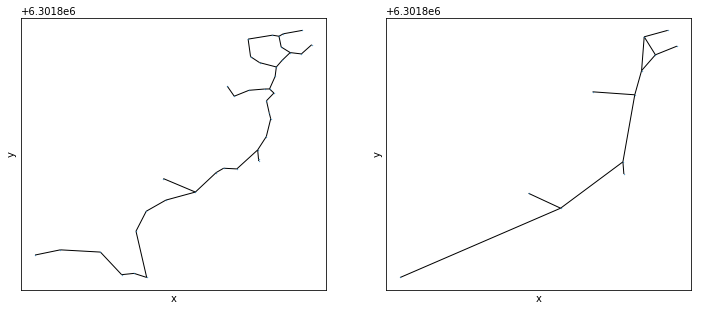

In [12]:
# Simple map view of original data (left) and simplified graph (right)
huttes.plot()

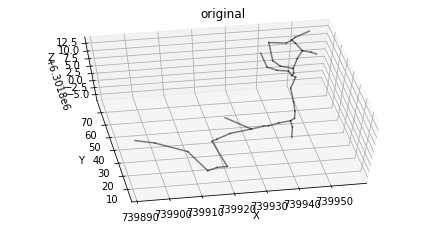

In [13]:
# Visualization of the original data
huttes.plot3(zrotation=60, xyrotation=10)

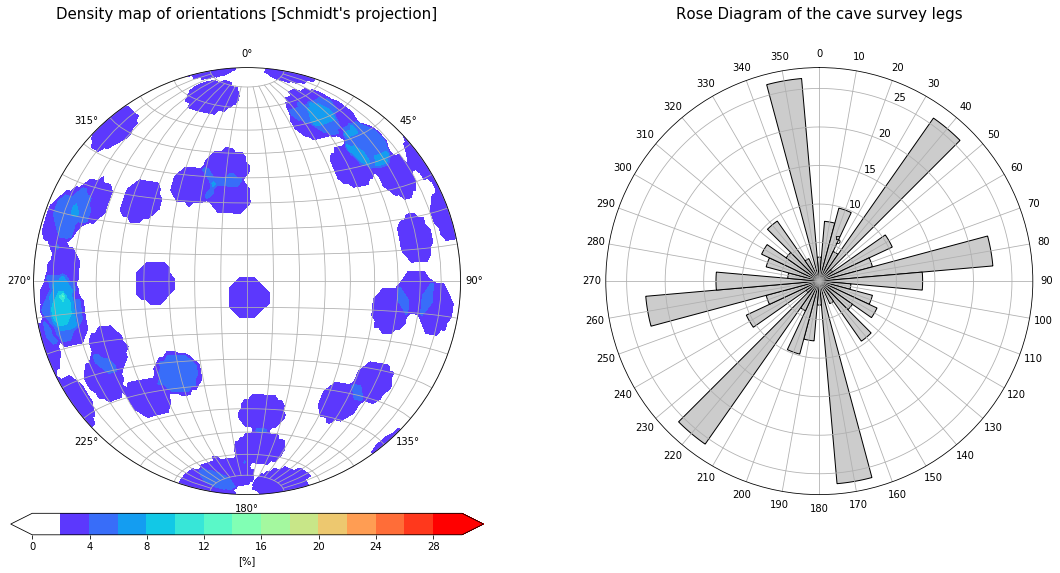

In [14]:
# Density map of orientation and rose diagram
huttes.stereo()

### Computing the statistical metrics

The simplest way to obtain all the statistics for that graph is to call the characterize_graph function as follows.

In [15]:
results = huttes.characterize_graph( verbose=True )

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 15.872
                 cv length = 0.999
            length entropy = 0.512
                tortuosity = 1.207
       orientation entropy = 0.977
                      aspl = 3.015
                       cpd = 0.474
               mean degree = 2.000
                 cv degree = 0.500
 correlation vertex degree = -0.333
--------------------------------------
